# WEB SCRAPING - VIVAREAL

In [184]:
import re
from bs4 import BeautifulSoup
import pandas as pdR
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

coleta = requests.get('https://www.vivareal.com.br/aluguel/sp/campinas/?__vt=lnv:a&pagina=4#ordenar-por=preco-total:ASC')
coleta.status_code

200

In [182]:
lista_imoveis = []

In [235]:
paginas = int(input("Digite o numero de paginas que deseja extrair: "))

driver = webdriver.Chrome()

driver.get('https://www.vivareal.com.br/aluguel/sp/campinas/apartamento_residencial/?pagina=2#preco-ate=5000')
sleep(2)

#Varre a quantidade de paginas desejadas 
for n in range (1,paginas,1):
    
    #clica no botão próxima página
    driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="js-site-main"]/div[2]/div[1]/section/div[2]/div[2]/div/ul/li[9]/button'))))
    sleep(3)
    
    page_content = driver.page_source
 
    site = BeautifulSoup(page_content, 'html.parser')
    
    #print(site)
    sleep(2)
    #Coleta a localização da div mãe
    imoveis = site.findAll('article', attrs={'class': 'property-card__container js-property-card'})
    
    #print(imoveis)
    #Busca as tags correspondentes dentro da div mãe
    for n in imoveis:
        

        #coleta ao titulo
        titulo = n.find(class_="property-card__title js-cardLink js-card-title").text.strip()
        
        #coleta o endereco
        endereco = n.find('span', attrs={'class': 'property-card__address'}) 
        
        #coleta o metragem
        metro = n.find(class_="property-card__detail-value js-property-card-value property-card__detail-area js-property-card-detail-area").text.strip()
        
        #coleta o quarto
        quarto = n.find(class_="property-card__detail-item property-card__detail-room js-property-detail-rooms").text.strip()
        quarto.rstrip("Quarto")
        
        #coleta banheiro
        banheiro = n.find(class_="property-card__detail-item property-card__detail-bathroom js-property-detail-bathroom").text.strip() 
        
        #coleta garagem
        garagem = n.find(class_="property-card__detail-item property-card__detail-garage js-property-detail-garages").text.strip() 
        
        #coleta preco
        preco = n.find(class_="property-card__price js-property-card-prices js-property-card__price-small").text.strip() 
        
        #Armazena os dados coletados na div
        lista_imoveis.append([titulo, endereco.text, metro, quarto, banheiro, garagem, preco])



Digite o numero de paginas que deseja extrair: 2


In [7]:
#Cria dataframe
df = pd.DataFrame(lista_imoveis, columns=['Título','Endereço', 'Metro_m2', 'N_Quartos', 'N_Banheiros', 'N_Garagens', 'Valor_Mensal'])
#Salva datraframe em arquivo csv
df.to_csv('vvivareal_campinas.csv', index=False)
df.head()


,Título,Endereço,Metro_m2,N_Quartos,N_Banheiros,N_Garagens,Valor_Mensal
0,"Apartamento com 3 Quartos para Aluguel, 96m²",Avenida Maria Emília Alves dos Santos de Ângel...,96,3\n \n\n Quartos,2\n \n\n Banheiros,2\n \n\n Vagas,R$ 2.800\n /Mês
1,Apartamento com Quarto para Venda/Aluguel 37m²,"Avenida Francisco Glicério, 1745 - Centro, Cam...",37,1\n \n\n Quarto,1\n \n\n Banheiro,--\n \n\n Vaga,R$ 780\n /Mês
2,"Apartamento com 2 Quartos para Aluguel, 70m²","Rua Reinaldo Laubenstein, 271 - Jardim Chapadã...",70,2\n \n\n Quartos,1\n \n\n Banheiro,1\n \n\n Vaga,R$ 950\n /Mês
3,"Apartamento com Quarto para Aluguel, 50m²","Botafogo, Campinas - SP",50,1\n \n\n Quarto,1\n \n\n Banheiro,1\n \n\n Vaga,R$ 900\n /Mês
4,"Apartamento com 2 Quartos para Aluguel, 54m²",Rua Bernardino Martins Filho - Jardim das Band...,54,2\n \n\n Quartos,1\n \n\n Banheiro,1\n \n\n Vaga,R$ 750\n /Mês


# Parte 2 - Análise Exploratória dos Dados

In [185]:
df = pd.read_csv('vvivareal_campinas.csv')
df.shape[0] 

5508

In [186]:
df.head()

,Título,Endereço,Metro_m2,N_Quartos,N_Banheiros,N_Garagens,Valor_Mensal
0,"Apartamento com 3 Quartos para Aluguel, 96m²",Avenida Maria Emília Alves dos Santos de Ângel...,96,3\n \n\n Quartos,2\n \n\n Banheiros,2\n \n\n Vagas,R$ 2.800\n /Mês
1,Apartamento com Quarto para Venda/Aluguel 37m²,"Avenida Francisco Glicério, 1745 - Centro, Cam...",37,1\n \n\n Quarto,1\n \n\n Banheiro,--\n \n\n Vaga,R$ 780\n /Mês
2,"Apartamento com 2 Quartos para Aluguel, 70m²","Rua Reinaldo Laubenstein, 271 - Jardim Chapadã...",70,2\n \n\n Quartos,1\n \n\n Banheiro,1\n \n\n Vaga,R$ 950\n /Mês
3,"Apartamento com Quarto para Aluguel, 50m²","Botafogo, Campinas - SP",50,1\n \n\n Quarto,1\n \n\n Banheiro,1\n \n\n Vaga,R$ 900\n /Mês
4,"Apartamento com 2 Quartos para Aluguel, 54m²",Rua Bernardino Martins Filho - Jardim das Band...,54,2\n \n\n Quartos,1\n \n\n Banheiro,1\n \n\n Vaga,R$ 750\n /Mês


In [187]:
#Remove valores duplicados
df = df.drop_duplicates()
df.shape[0] 

2834

In [188]:
#Remove todas strings das colunas definidas 
df['N_Banheiros'] = df['N_Banheiros'].str.extract('(\d+)', expand=False)
df['N_Garagens'] = df['N_Garagens'].str.extract('(\d+)', expand=False)
df['N_Quartos'] = df['N_Quartos'].str.extract('(\d+)', expand=False)

df["Valor_Mensal"] = df["Valor_Mensal"].astype(str)
df["Valor_Mensal"] = df["Valor_Mensal"].str.replace('.', '')
df['Valor_Mensal'] = df['Valor_Mensal'].str.extract('(\d+)', expand=False)
#df.head()

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2834 entries, 0 to 5507
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Título        2834 non-null   object
 1   Endereço      2834 non-null   object
 2   Metro_m2      2834 non-null   int64 
 3   N_Quartos     2834 non-null   object
 4   N_Banheiros   2834 non-null   object
 5   N_Garagens    2454 non-null   object
 6   Valor_Mensal  2834 non-null   object
dtypes: int64(1), object(6)
memory usage: 177.1+ KB


In [190]:
#Substitui campos 'Nan' por 0
df = df.fillna(0)
#Converte a coluna para int
df = df.astype({'N_Quartos' : 'int',
               'N_Banheiros' : 'int',
               'N_Garagens' : 'int',
               'Valor_Mensal' : 'int'})

In [191]:
df.describe()

,Metro_m2,N_Quartos,N_Banheiros,N_Garagens,Valor_Mensal
count,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,76.791108,2.054693,1.772759,1.193366,1996.532463
std,46.170070,0.864347,0.983388,0.773282,1147.317489
min,10.000000,1.000000,1.000000,0.000000,400.000000
25%,50.000000,1.000000,1.000000,1.000000,1100.000000
50%,65.000000,2.000000,1.000000,1.000000,1600.000000
75%,86.000000,3.000000,2.000000,2.000000,2700.000000
max,400.000000,5.000000,6.000000,11.000000,5000.000000


### Quantidade de Linhas(Dados)

In [192]:
df.shape[0] 

2834

### Moradias Agrupadas por Metragem

In [193]:
df.Metro_m2.value_counts()

50     165
45     123
70     122
60     102
55      92
      ... 
31       1
207      1
112      1
285      1
281      1
Name: Metro_m2, Length: 197, dtype: int64

(-0.5, 19.5)

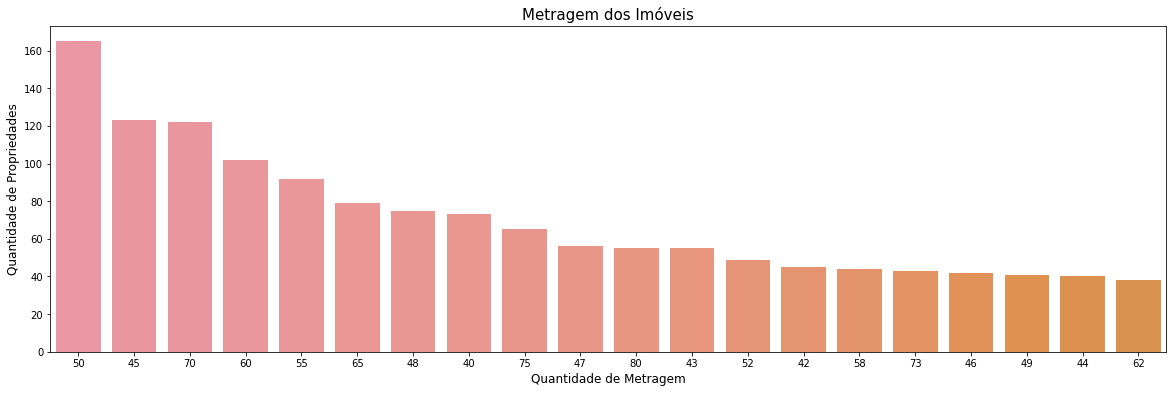

In [194]:
fig = plt.figure(figsize=(20,6))
sns.countplot(x='Metro_m2',order=df['Metro_m2'].value_counts().index,data=df)

plt.title('Metragem dos Imóveis',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Quantidade de Metragem',fontsize=12)
plt.xlim(-0.5,19.5)

### Moradias Agrupadas por Número de Banheiros

In [195]:
df.N_Banheiros.value_counts()

1    1426
2     888
3     330
4     123
5      62
6       5
Name: N_Banheiros, dtype: int64

Text(0.5, 0, 'Quantidade de Banheiro')

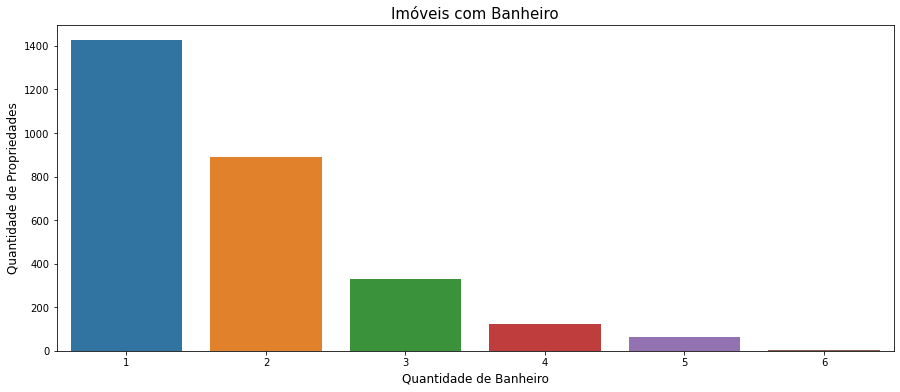

In [196]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='N_Banheiros',order=df['N_Banheiros'].value_counts().index,data=df)

plt.title('Imóveis com Banheiro',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Quantidade de Banheiro',fontsize=12)


### Moradias Agrupadas por Número de Quartos

In [197]:
df.N_Quartos.value_counts()

2    1104
1     850
3     765
4     105
5      10
Name: N_Quartos, dtype: int64

Text(0.5, 0, 'Quantidade de Quartos')

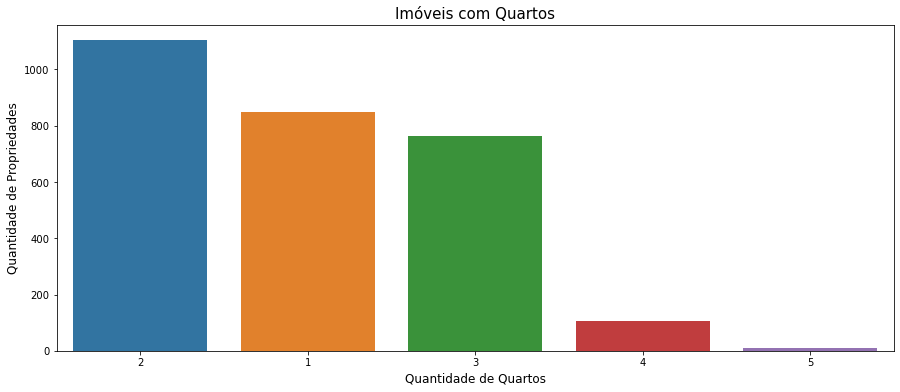

In [198]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='N_Quartos',order=df['N_Quartos'].value_counts().index,data=df)

plt.title('Imóveis com Quartos',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Quantidade de Quartos',fontsize=12)

### Moradias Agrupadas por Número de Vagas

In [199]:
df.N_Garagens.value_counts()

1     1678
2      661
0      380
3       98
4       11
7        2
5        2
9        1
11       1
Name: N_Garagens, dtype: int64

Text(0.5, 0, 'Quantidade de Garagens')

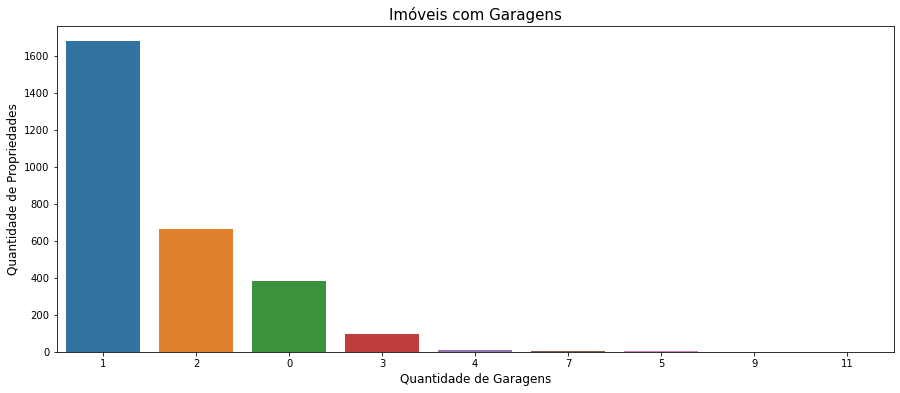

In [200]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='N_Garagens',order=df['N_Garagens'].value_counts().index,data=df)

plt.title('Imóveis com Garagens',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Quantidade de Garagens',fontsize=12)
#plt.xlim(-0.5,19.5)

## Ocorrências

**Ocorrência de Metragem**

In [201]:
df.Metro_m2.value_counts() / df.shape[0]

50     0.058222
45     0.043402
70     0.043049
60     0.035992
55     0.032463
         ...   
31     0.000353
207    0.000353
112    0.000353
285    0.000353
281    0.000353
Name: Metro_m2, Length: 197, dtype: float64

**Ocorrência de Banheiros**

In [202]:
df.N_Banheiros.value_counts() / df.shape[0]

1    0.503176
2    0.313338
3    0.116443
4    0.043402
5    0.021877
6    0.001764
Name: N_Banheiros, dtype: float64

**Ocorrência de Quartos**

In [203]:
df.N_Quartos.value_counts() / df.shape[0]

2    0.389555
1    0.299929
3    0.269936
4    0.037050
5    0.003529
Name: N_Quartos, dtype: float64

**Ocorrência de Garagens**

In [204]:
df.N_Garagens.value_counts() / df.shape[0]

1     0.592096
2     0.233239
0     0.134086
3     0.034580
4     0.003881
7     0.000706
5     0.000706
9     0.000353
11    0.000353
Name: N_Garagens, dtype: float64

### Blox Plot #

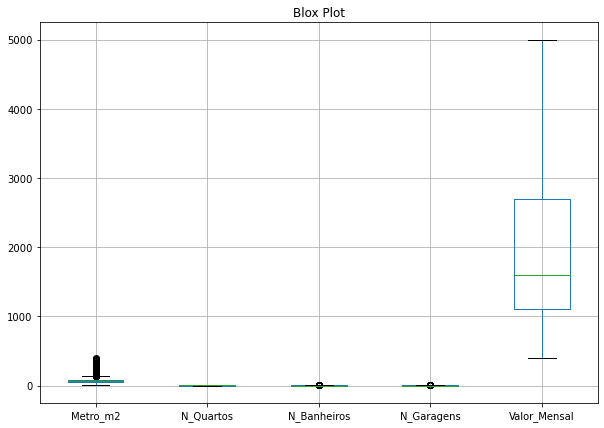

In [205]:
df.boxplot(figsize=(10,7))
plt.title("Blox Plot")
plt.show()

### Histograma #

array([[<AxesSubplot:title={'center':'Metro_m2'}>,
        <AxesSubplot:title={'center':'N_Quartos'}>],
       [<AxesSubplot:title={'center':'N_Banheiros'}>,
        <AxesSubplot:title={'center':'N_Garagens'}>],
       [<AxesSubplot:title={'center':'Valor_Mensal'}>, <AxesSubplot:>]],
      dtype=object)

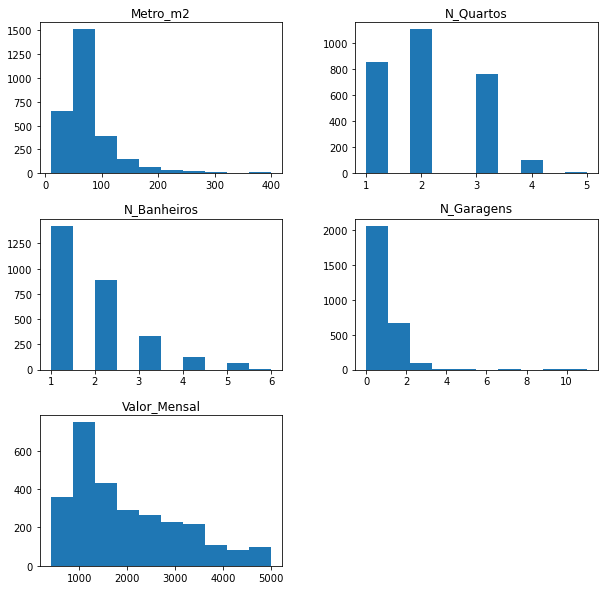

In [206]:
df.hist(grid=False, figsize=(10,10))

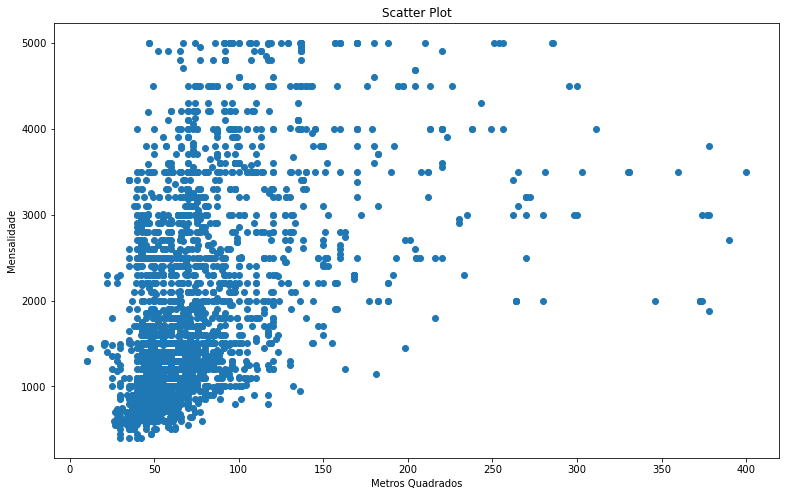

In [207]:
plt.figure(figsize=(13,8))
plt.scatter(df['Metro_m2'],  df['Valor_Mensal'])
plt.title('Scatter Plot')
plt.xlabel('Metros Quadrados')
plt.ylabel('Mensalidade')
plt.show()

### Mensalidade

In [208]:
df.Valor_Mensal.value_counts()

1200    153
1000    131
1500    109
1300     98
3500     95
       ... 
735       1
1137      1
866       1
1420      1
1712      1
Name: Valor_Mensal, Length: 292, dtype: int64

(-0.5, 9.5)

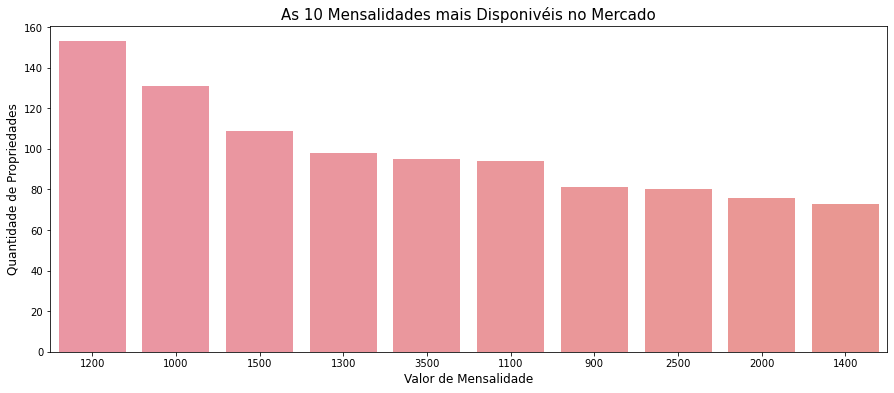

In [209]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='Valor_Mensal',order=df['Valor_Mensal'].value_counts().index,data=df)

plt.title('As 10 Mensalidades mais Disponivéis no Mercado',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Valor de Mensalidade',fontsize=12)

plt.xlim(-0.5,9.5)

### Correlação

In [210]:
corr_df = df.corr()
print("Correlação:")
print(corr_df, "\n")

Correlação:
              Metro_m2  N_Quartos  N_Banheiros  N_Garagens  Valor_Mensal
Metro_m2      1.000000   0.689146     0.759635    0.491160      0.460820
N_Quartos     0.689146   1.000000     0.655819    0.533938      0.428892
N_Banheiros   0.759635   0.655819     1.000000    0.580940      0.605324
N_Garagens    0.491160   0.533938     0.580940    1.000000      0.632037
Valor_Mensal  0.460820   0.428892     0.605324    0.632037      1.000000 



<AxesSubplot:>

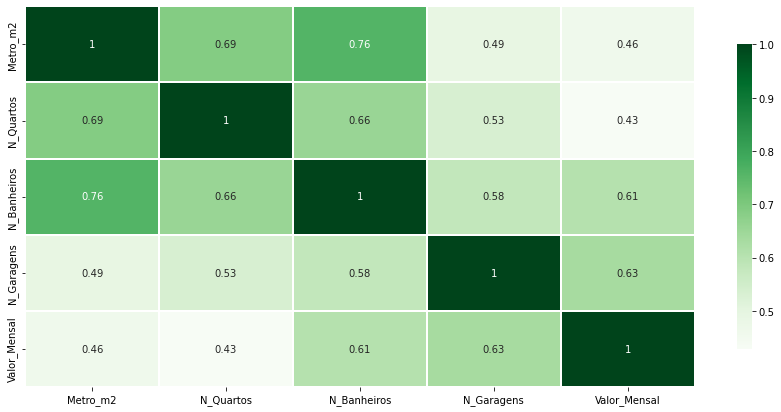

In [211]:
plt.figure(figsize = (15,7))
sns.heatmap(df[corr_df.index].corr(), cmap='Greens', linewidth=0.3, annot=True, cbar_kws={"shrink": .8})

# Trabalho 3 - Algoritmos de Machine Learning

In [214]:
df.head()

,Título,Endereço,Metro_m2,N_Quartos,N_Banheiros,N_Garagens,Valor_Mensal
0,"Apartamento com 3 Quartos para Aluguel, 96m²",Avenida Maria Emília Alves dos Santos de Ângel...,96,3,2,2,2800
1,Apartamento com Quarto para Venda/Aluguel 37m²,"Avenida Francisco Glicério, 1745 - Centro, Cam...",37,1,1,0,780
2,"Apartamento com 2 Quartos para Aluguel, 70m²","Rua Reinaldo Laubenstein, 271 - Jardim Chapadã...",70,2,1,1,950
3,"Apartamento com Quarto para Aluguel, 50m²","Botafogo, Campinas - SP",50,1,1,1,900
4,"Apartamento com 2 Quartos para Aluguel, 54m²",Rua Bernardino Martins Filho - Jardim das Band...,54,2,1,1,750


In [215]:
X = df[['Metro_m2','N_Quartos','N_Banheiros','N_Garagens']]
y = df['Valor_Mensal']
#y

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
scaler = MinMaxScaler()
XtrainS = scaler.fit_transform(Xtrain)
XtestS = scaler.transform(Xtest)

In [218]:
rl = LinearRegression()
rl.fit(XtrainS, Ytrain)

rl.score(XtestS, Ytest)

0.5561615481244051

In [219]:
neigh = KNeighborsRegressor()
neigh.fit(XtrainS, Ytrain)

neigh.score(XtestS, Ytest)

0.5965904350962707

In [220]:
rf = RandomForestRegressor()
rf.fit(XtrainS, Ytrain)

rf.score(XtestS, Ytest)

0.6142277415907256

In [221]:
regr = AdaBoostRegressor()
regr.fit(XtrainS, Ytrain)

regr.score(XtestS, Ytest)

0.5550947169426041

In [232]:
param_grid =  {
    'n_estimators':[200, 300, 400, 500, 600],
    #'max_features':[0.1, 0.3, 0.6],
    'max_features' : ["auto", "log2", "sqrt"],
    'min_samples_split': [1, 2, 3],
    'max_depth': [None, 1, 2, 3],
    'bootstrap': [True, False]
}
RandForest = RandomForestRegressor()

Tuned_RandForest = GridSearchCV(RandForest, param_grid=param_grid, cv=5)

In [233]:
start_time = time.process_time()
Tuned_RandForest.fit(X_train, y_train)

print(time.process_time() - start_time, "Seconds")

533.328125 Seconds


In [234]:
Tuned_RandForest.score(X_test, y_test)

0.6222405365891929